# Loading EMNIST dataset

In [1]:
import time
import warnings
warnings.filterwarnings('ignore')
from mnist import MNIST #this is for loading emnist as input data
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
emnist = MNIST('C:\\Users\\Anandh\\Anaconda3\\final year project\emnist_data')
emnist.select_emnist('balanced')

images,labels = emnist.load_training()
testIM,testLAB = emnist.load_testing()

In [3]:
n_images = np.array(images)
n_labels = np.array(labels)
testIM = np.array(testIM)
testLAB = np.array(testLAB)

In [7]:
pwd


'C:\\Users\\Anandh\\Anaconda3\\final year project'

## Visualizing the dataset

In [5]:
n_images1 = n_images[19000].reshape(28,28)

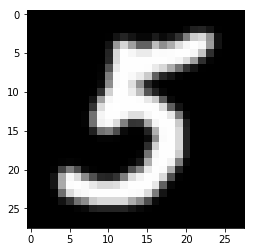

In [6]:
plt.imshow(n_images1,cmap='gist_gray')
plt.show()

## Fitting data between 0 and 1

In [13]:
n_images[0][455]

207

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(n_images)
train_images = scaler.transform(n_images)

In [15]:
train_images[0][455]

0.8117647058823529

In [16]:
scaler.fit(testIM)
test_images = scaler.transform(testIM)

In [17]:
testIM[0][567]

19

In [18]:
test_images[0][567]

0.07450980392156863

# Adding new Dataset

In [19]:
from PIL import ImageFilter,Image
import helper

In [20]:
count=47
for k in range(1,15):
    for i in range(1,50):
        try:
            im = Image.open('new_dataset/a{}- ({}).jpg'.format(k,i)).convert('LA')
            print("done")
        except:
            print("error")
            break
        n_image = helper.normalize_to_emnist(im)
        train_images = np.append(train_images,[n_image],axis=0)
        test_images = np.append(test_images,[n_image],axis=0)
        n_labels = np.append(n_labels,[count])
        testLAB = np.append(testLAB,[count])
    count+=1
    

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
error
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
error
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
error
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
error
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
error
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
error
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
error
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
error
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
error
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
error
done
done
done
done
done
done
done
done


In [80]:
print(len(train_images))
print(len(test_images))
print(len(n_labels))
print(len(testLAB))

113016
19016
113016
19016


In [21]:
%store n_images
%store n_labels
%store testIM 
%store testLAB

Stored 'n_images' (ndarray)
Stored 'n_labels' (ndarray)
Stored 'testIM' (ndarray)
Stored 'testLAB' (ndarray)


In [22]:
n_labels[113015]

58

## One hot encoding of labels

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
n_labels[0]

45

In [25]:
shaped_n_labels  = n_labels.reshape(-1,1)
enc = OneHotEncoder()
enc.fit(shaped_n_labels)
train_labels = enc.transform(shaped_n_labels).toarray()

In [28]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [27]:
shaped_testLAB = testLAB.reshape(-1,1)
enc.fit(shaped_testLAB)
test_labels = enc.transform(shaped_testLAB).toarray()

## Functions

In [29]:
# initialising weights
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape,stddev=0.1)
    return tf.Variable(init_random_dist)
# initialising bias
def init_bias(shape):
    init_bias_vals = tf.constant(0.1,shape=shape)
    return tf.Variable(init_bias_vals)
#conv2d
def conv2d(x,W):
    #x -> [bias,height,width,channels]
    #W -> [Filter H,filter W,Channel In,Channel Out]
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')
#pooling layer
def max_pool_2by2(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
#Convolutional layer
def convolutional_layer(input_x,shape):
    W=init_weights(shape)
    bias = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x,W)+bias)
#Fully connected layer
def normal_full_layer(input_layer,size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size,size])
    bias = init_bias([size])
    return tf.matmul(input_layer,W) + bias

## Creating model

In [90]:
#placeholders
x = tf.placeholder(tf.float32,shape=[None,784])
y_true=tf.placeholder(tf.float32,shape=[None,59])

#layers(input)
x_image = tf.reshape(x,[-1,28,28,1])

#first convolutional layer
convo_1 = convolutional_layer(x_image,shape=[5,5,1,32])
convo_1_pooling = max_pool_2by2(convo_1)

#second convolutional layer
convo_2 = convolutional_layer(convo_1_pooling,shape=[5,5,32,64])
convo_2_pooling = max_pool_2by2(convo_2)

#fully connected layer
convo_flat = tf.reshape(convo_2_pooling,[-1,7*7*64])
full_layer_one = tf.nn.relu(normal_full_layer(convo_flat,1024))



# Drop out and Optimization

In [91]:
#drop out (used to overcome overfitting)

hold_prob = tf.placeholder(tf.float32)
full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob)

y_pred = normal_full_layer(full_one_dropout,59)

#Loss Function 
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits = y_pred))

#optimizer
optimizer = tf.train.AdamOptimizer(learning_rate = 0.001)
train =optimizer.minimize(cross_entropy)

#initialise variables to execute it
init = tf.global_variables_initializer()

steps = 5000

# Training and Saving the model

In [92]:
saver = tf.train.Saver()

In [93]:
start = time.time()
with tf.Session() as sess:
    sess.run(init)
    batch_size = 120
    for i in range(steps):
        rand_ind = np.random.randint(len(train_images),size=batch_size)
        feed = {x:train_images[rand_ind],y_true:train_labels[rand_ind],hold_prob:0.5}
        sess.run(train,feed_dict=feed)
        
        if i%100 == 0:
            print("On step: {}".format(i))
            match = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))
            acc = tf.reduce_mean(tf.cast(match,tf.float32))
            print("Accuracy obtained at {x} is {y}".format(x=i,y=sess.run(acc,feed_dict={x:test_images,y_true:test_labels,hold_prob:1.0})))
            print('\n')
    saver.save(sess,'model/cnn_model_1_with_tamil.ckpt')
end = time.time()
        

On step: 0
Accuracy obtained at 0 is 0.027555743232369423


On step: 100
Accuracy obtained at 100 is 0.684949517250061


On step: 200
Accuracy obtained at 200 is 0.7584139704704285


On step: 300
Accuracy obtained at 300 is 0.7923327684402466


On step: 400
Accuracy obtained at 400 is 0.8056373596191406


On step: 500
Accuracy obtained at 500 is 0.8155237436294556


On step: 600
Accuracy obtained at 600 is 0.8235695958137512


On step: 700
Accuracy obtained at 700 is 0.8320361971855164


On step: 800
Accuracy obtained at 800 is 0.8375052809715271


On step: 900
Accuracy obtained at 900 is 0.8399768471717834


On step: 1000
Accuracy obtained at 1000 is 0.8400294780731201


On step: 1100
Accuracy obtained at 1100 is 0.8467080593109131


On step: 1200
Accuracy obtained at 1200 is 0.8494426012039185


On step: 1300
Accuracy obtained at 1300 is 0.8498106598854065


On step: 1400
Accuracy obtained at 1400 is 0.8532814383506775


On step: 1500
Accuracy obtained at 1500 is 0.8604333400726318



# Predicting the input image

In [22]:
from sklearn.metrics import log_loss

In [126]:
%store -r n_image

In [127]:
with tf.Session() as sess:
        sess.run(init)
        saver.restore(sess, "model/cnn_model_1_with_tamil.ckpt")
       
        prediction=tf.argmax(y_pred,1)
        var = prediction.eval(feed_dict={x: [n_image],y_true:train_labels,hold_prob: 0.5}, session=sess)


INFO:tensorflow:Restoring parameters from model/cnn_model_1_with_tamil.ckpt


In [128]:
labels_dict ={0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8,9:9,10:'A',11:'B',12:'C',13:'D',14:'E',15:'F',16:'G',17:'H',18:'I',19:'J',20:'K',21:'l',22:'M',23:'N',24:'O',25:'P',26:'Q',27:'R',28:'S',29:'T',30:'u',31:'V',32:'W',33:'X',34:'Y',35:'Z',36:'a',37:'b',38:'d',39:'e',40:'f',41:'g',42:'h',43:'n',44:'q',45:'r',46:'t',47:'அ',48:'ஆ'}
labels_dict[49]="இ"
labels_dict[50]='ஈ'
labels_dict[51]='உ'
labels_dict[52]='ஊ'
labels_dict[53]='எ'
labels_dict[54]='ஏ'
labels_dict[55]='ஐ'
labels_dict[56]='ஒ'
labels_dict[57]='ஓ'
labels_dict[58]='ஔ'

In [129]:
print('The predicted character is : "{}"'.format(labels_dict[var[0]]))   

The predicted character is : "ஏ"


In [124]:
n_images.shape

(112800, 784)

In [2]:
%store -r n_images
%store -r n_labels
%store -r testIM 
%store -r testLAB